<a href="https://colab.research.google.com/github/ZahraDehghani99/FacemaskWearingAlertSystem/blob/main/examples/FaceDetector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Face Detection using MTCNN

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install mtcnn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.3 MB 5.1 MB/s 


In [ ]:
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import cv2

from mtcnn.mtcnn import MTCNN


In [ ]:
!unzip -q "/content/drive/MyDrive/DIP_final_proj/dataset/WIDER_train.zip"

In [ ]:
# load image from file
pixels = plt.imread('/content/drive/MyDrive/DIP_final_proj/dataset/WIDER_train/images/19--Couple/19_Couple_Couple_19_999.jpg')

In [ ]:
pixels.shape

(576, 1024, 3)

In [ ]:
# create the detector, using default weights
detector = MTCNN()
# detect faces in the image
results = detector.detect_faces(pixels)

In [ ]:
results

[{'box': [434, 183, 204, 261],
  'confidence': 0.9982299208641052,
  'keypoints': {'left_eye': (480, 284),
   'mouth_left': (481, 394),
   'mouth_right': (553, 403),
   'nose': (509, 342),
   'right_eye': (573, 292)}}]

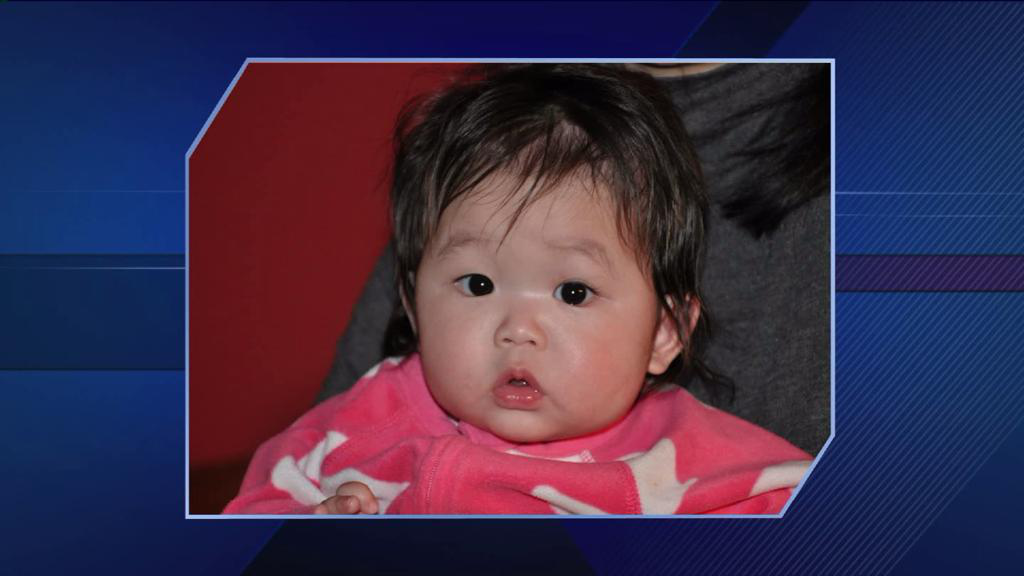

In [ ]:
image_2 = cv2.cvtColor(pixels, cv2.COLOR_BGR2RGB)
cv2_imshow(image_2)

In [ ]:
type(image_2)

numpy.ndarray

In [ ]:
# extract the bounding box from the first face
x1, y1, width, height = results[0]['box']
x2, y2 = x1 + width, y1 + height

In [ ]:
# extract the face
face = pixels[y1:y2, x1:x2]

In [ ]:
face.shape

(261, 204, 3)

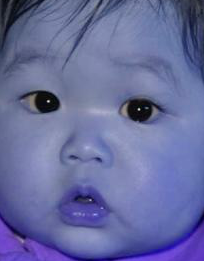

In [ ]:
cv2_imshow(face)

In [ ]:
from PIL import *
import numpy as np

# resize pixels to the model size
image = Image.fromarray(face)
image = image.resize((224, 224))
face_array = np.asarray(image)

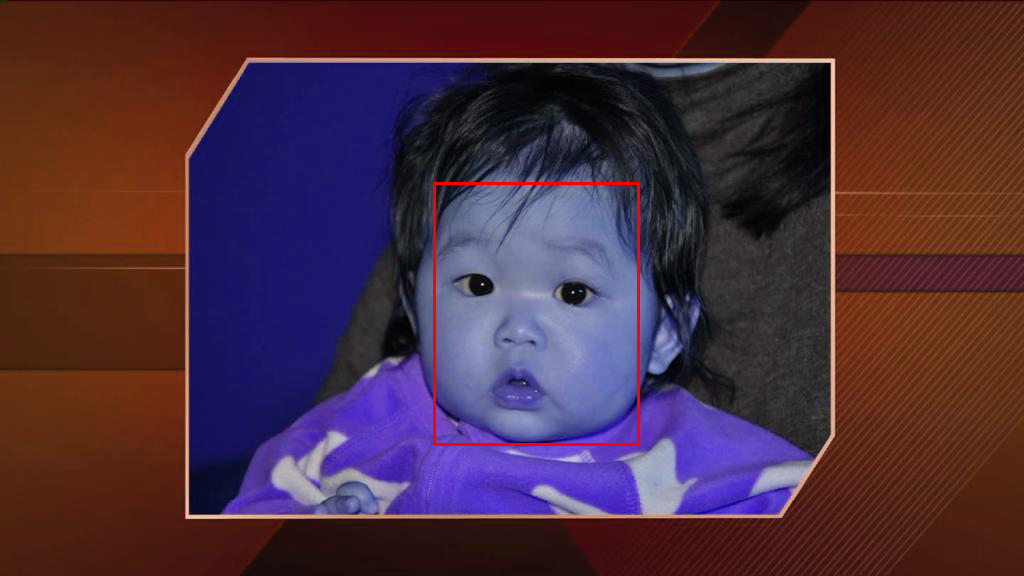

In [ ]:
from cv2 import rectangle
for i in range(len(results)):
  x1, y1, width, height = results[i]['box']
  x2, y2 = x1 + width, y1 + height
  rectangle(pixels, (x1, y1), (x2, y2), (0,0,255), 2)
cv2_imshow(pixels)  

lets create a functions

In [ ]:
def detect_face(path_to_img):
  pixels = plt.imread(path_to_img)
  # create the detector, using default weights
  detector = MTCNN()
  # detect faces in the image
  results = detector.detect_faces(pixels)
  for i in range(len(results)):
    x1, y1, width, height = results[i]['box']
    x2, y2 = x1 + width, y1 + height
    rectangle(pixels, (x1, y1), (x2, y2), (0,0,255), 1)
  return pixels

load another picture

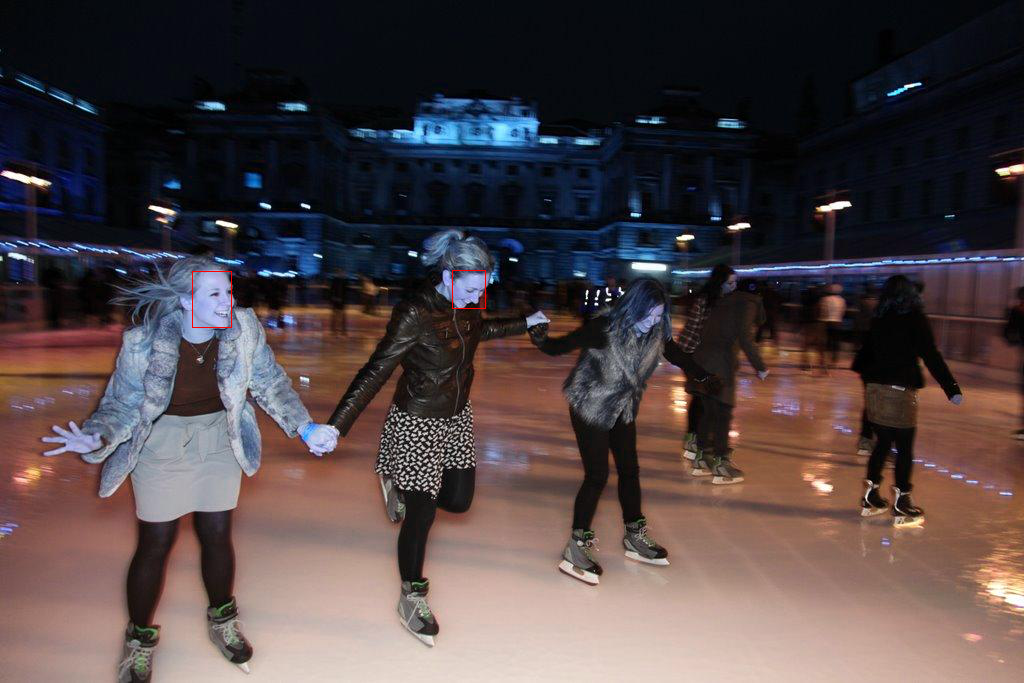

In [ ]:
cv2_imshow(detect_face('/content/drive/MyDrive/DIP_final_proj/dataset/WIDER_train/images/39--Ice_Skating/39_Ice_Skating_Ice_Skating_39_116.jpg'))